<a href="https://colab.research.google.com/github/FVRDaniel/FACE_RECOGNITION/blob/main/Face_Recognation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition
!apt-get install -y libgl1-mesa-glx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=09bdbc7447779150585f98f4879e777d85fb44ab0de10f04c3f44e995d9bb977
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libgl1-mesa-glx
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,584 B of archives.
After this operation, 74.8 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libgl1-mesa-glx amd64 23.0.4-0ubuntu1~22.04.1 [5,584 B]
Fetched 5,584 B in 0s (16.3 kB/s)
Selecting previously unselected package libgl1-me

In [ ]:
!pip uninstall -y dlib
!pip install dlib --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 180.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp310-cp310-linux_x86_64.whl size=4483488 sha256=01c6282e9366e799ed0c4ecd15a55b58fe751df1c78f3cfbbcbe03638b6766ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-f1e4rtld/wheels/7c/1d/d1/e69ceb001441acedfa6156acda6c1856699e260ea1a9e6dcc4
Successfully built dlib


In [ ]:
import cv2
import face_recognition as fr
from google.colab.patches import cv2_imshow
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


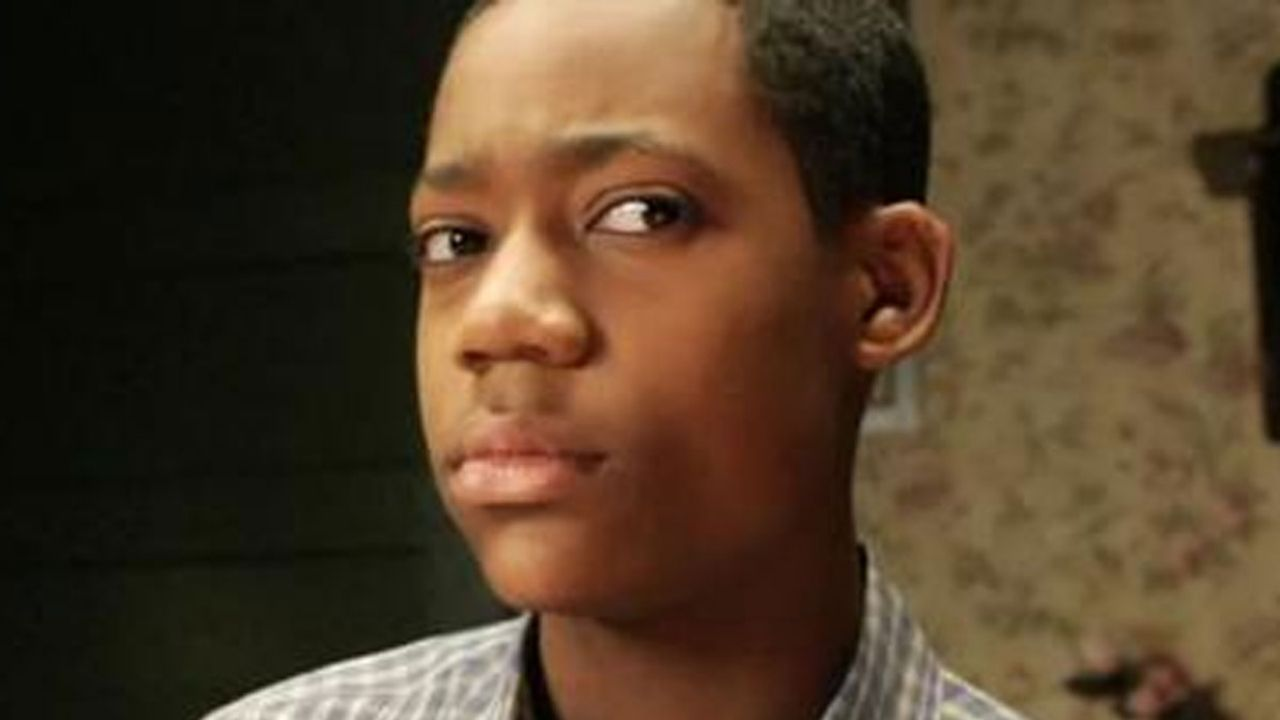

In [ ]:
img_cris = fr.load_image_file('/content/drive/MyDrive/face recognition/Personagens/cris.jpg')
img_cris = cv2.cvtColor(img_cris, cv2.COLOR_BGR2RGB)
cv2_imshow(img_cris)

In [ ]:
encode_cris = fr.face_encodings(img_cris)[0]
print(encode_cris)

[-0.14029354  0.04983282  0.15970343  0.00504915 -0.01132157 -0.15930155
  0.00220791 -0.09903537  0.1641745  -0.11566693  0.27224553  0.00972584
 -0.11447573 -0.13225643  0.09589706  0.15409112 -0.16022475 -0.09900212
 -0.10531446 -0.01223955  0.02272462  0.1041021   0.04771239  0.07735211
 -0.04012171 -0.32285056 -0.1391416  -0.13417314  0.05868459 -0.07160817
  0.03185997  0.07460876 -0.16951075 -0.04376385 -0.0318514   0.03120895
  0.0709049  -0.05027831  0.19083539  0.03749001 -0.20224014 -0.11009178
 -0.04757573  0.2576369   0.14197016 -0.05113767  0.0293199   0.00133207
 -0.03048432 -0.16517182  0.07081881  0.08494651  0.12875414  0.05804627
  0.00101129 -0.15618715  0.03288388  0.0443037  -0.21862227  0.01826498
  0.09955379 -0.12694292 -0.11982894  0.03666602  0.27784318  0.12734281
 -0.10797023 -0.15282018  0.168817   -0.14128569 -0.04856006  0.08567051
 -0.1792686  -0.09951012 -0.30883816  0.02002557  0.33897084  0.05617277
 -0.28639114 -0.00755741 -0.19356793  0.04447133  0

In [ ]:
# Caminhos
characters_path = '/content/drive/MyDrive/face recognition/Personagens'
test_images_path = '/content/drive/MyDrive/face recognition/Teste'

In [ ]:
known_face_encodings = []
known_face_names = []

for file_name in os.listdir(characters_path):
    if file_name.endswith(('.jpg', '.png')):
        image_path = os.path.join(characters_path, file_name)
        character_name = os.path.splitext(file_name)[0]

        img_character = fr.load_image_file(image_path)
        img_character = cv2.cvtColor(img_character, cv2.COLOR_BGR2RGB)
        encoding = fr.face_encodings(img_character)[0]

        known_face_encodings.append(encoding)
        known_face_names.append(character_name)


In [ ]:
def process_test_image(image_path):
    group_image = fr.load_image_file(image_path)
    group_image = cv2.cvtColor(group_image, cv2.COLOR_BGR2RGB)

    face_locations = fr.face_locations(group_image)
    face_encodings = fr.face_encodings(group_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = fr.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"

        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]

            # Desenhar um bounding box ao redor do rosto
            cv2.rectangle(group_image, (left, top), (right, bottom), (0, 255, 0), 2)

            # Adicionar uma etiqueta com o nome abaixo do rosto
            cv2.rectangle(group_image, (left, bottom - 35), (right, bottom), (0, 255, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(group_image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    cv2_imshow(group_image)

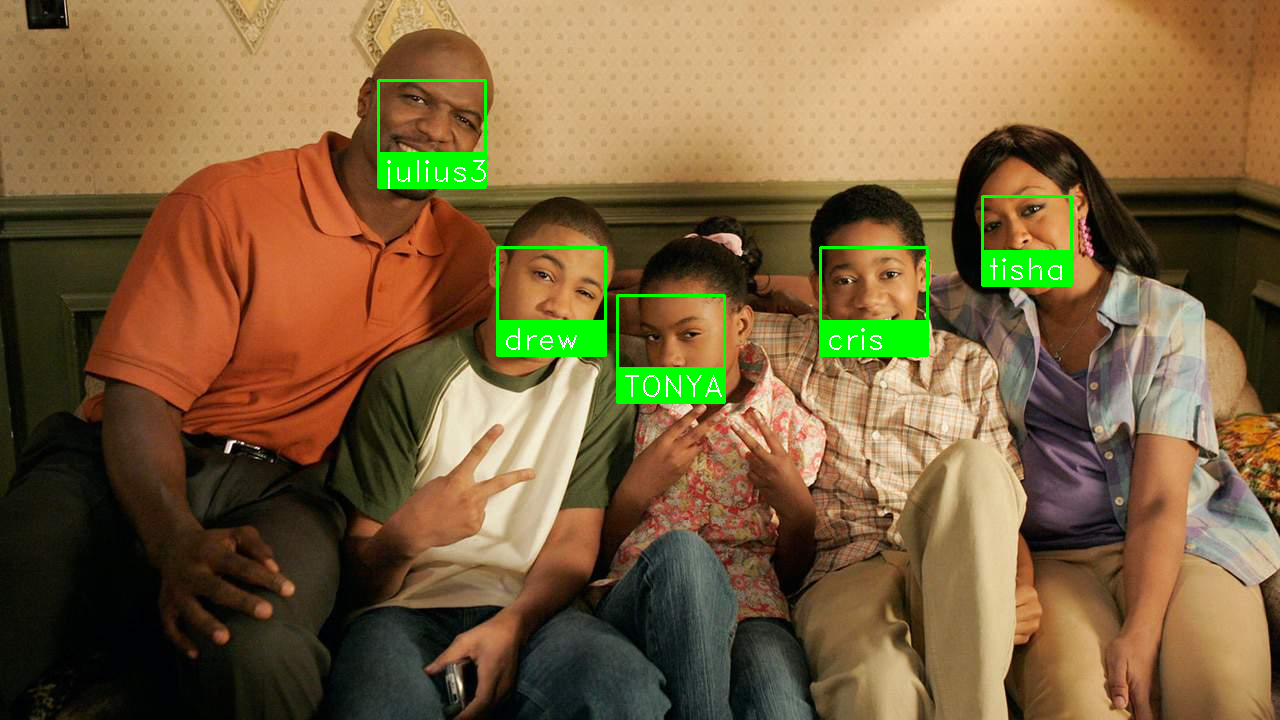

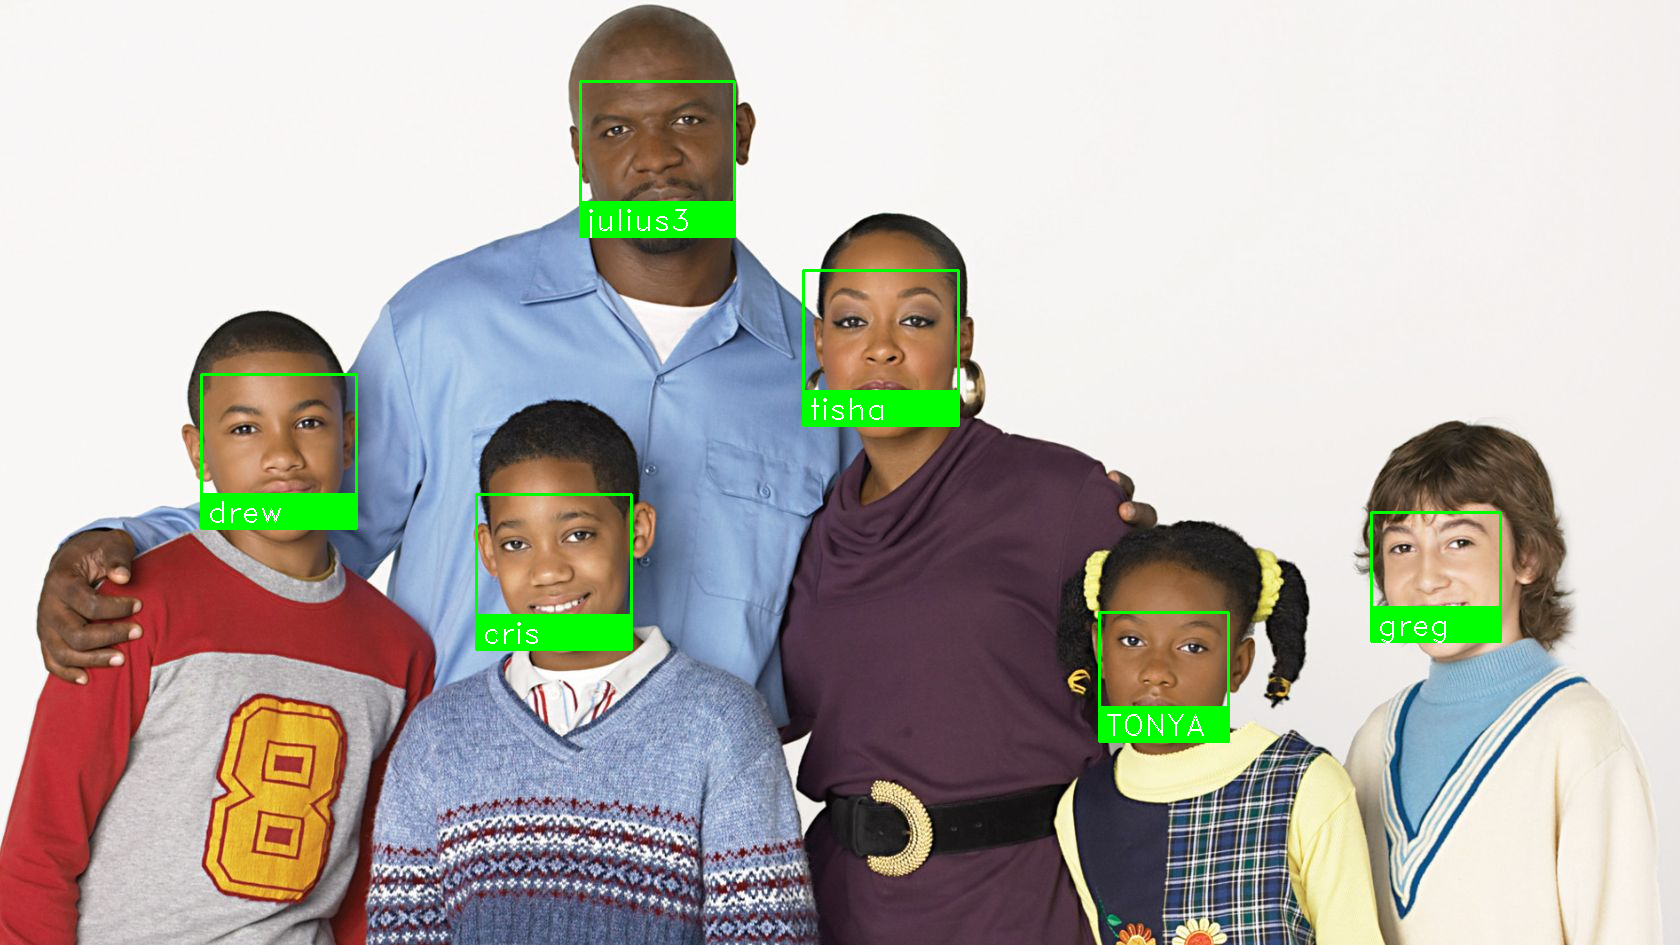

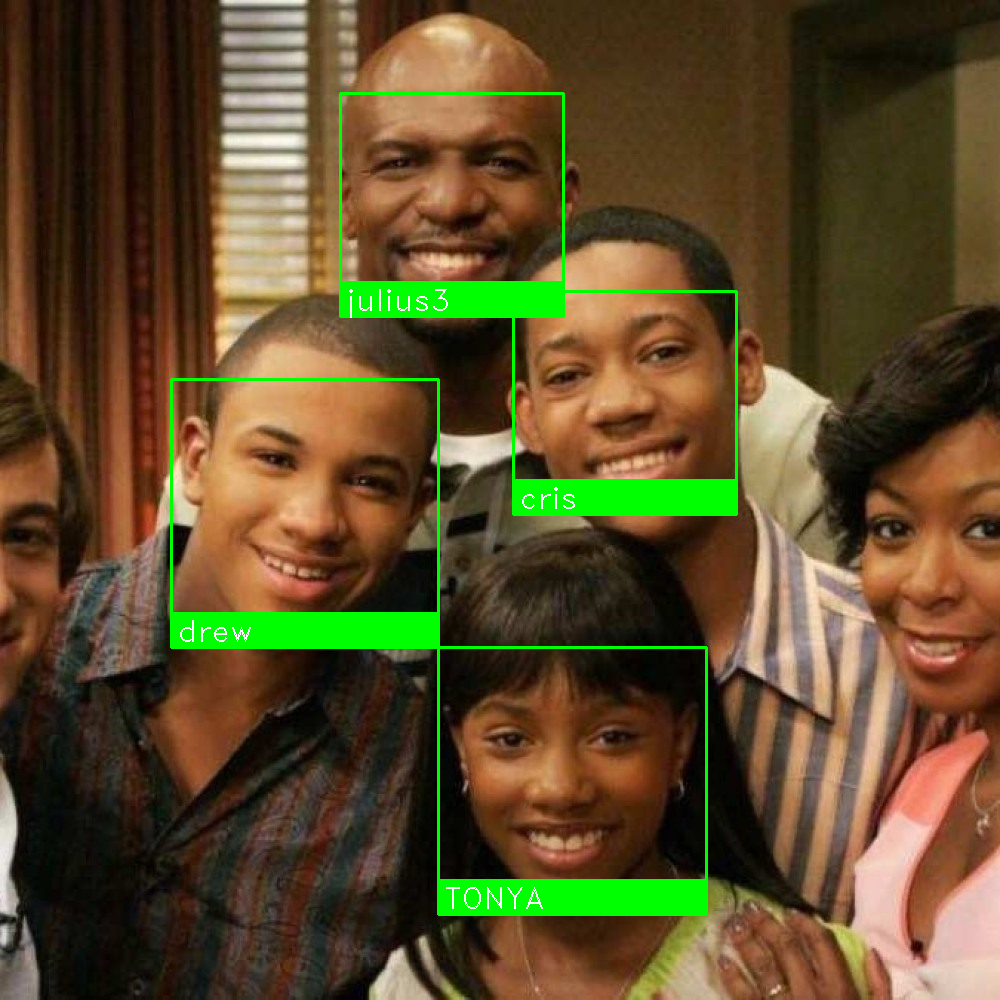

In [ ]:
# Processar e mostrar todas as imagens de teste
for test_image in os.listdir(test_images_path):
    if test_image.endswith(('.jpg', '.png')):
        image_path = os.path.join(test_images_path, test_image)
        process_test_image(image_path)